import 所需要的 modules

In [37]:
import gspread
from oauth2client.service_account import ServiceAccountCredentials
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import Image

設定將程式與試算表連結，使程式可由試算表讀值。

In [ ]:
def plot1(road):
    scope = ['https://spreadsheets.google.com/feeds',
             'https://www.googleapis.com/auth/drive']
    credentials = ServiceAccountCredentials.from_json_keyfile_name('D:\\台大\\大二下\\資料科學\\My First Project-5d1a7d0536a5.json', scope)
    gc = gspread.authorize(credentials)
    sh = gc.open_by_url('https://docs.google.com/spreadsheets/d/1FJPf9S2vpimDZvefrpnfq31cq3JpmySHse74WQoEgu4/edit?ts=5c8895e5#gid=618695640')
    wks4 = sh.worksheet("復興南北路")

將同一站點的車速隨時間變化資料以List抓下來，並將資料型態轉為整數。

In [ ]:
    time = wks4.col_values(3)
    st =[]
    st2=[]
    
    time.pop(0)
    time.pop(0)
    time.pop(0)
    cell = wks4.find(road)
    speed = wks4.col_values(cell.col)
    speed.pop(0)
    speed.pop(0)
    speed.pop(0)
    for i in range(len(time)):
        st2.append([time[i],speed[i]])
        st.append(st2[i])

    plt.style.use('bmh')
    fig = plt.figure()
    ax = plt.axes()

    stnum=[]
    for i in range(len(speed)):
        stnum.append(eval(speed[i].strip('Km/hr')))
    plt.plot(stnum)

    timex=[]
    timex2=[]
    for j in range(1,len(time),4):
        timex.append(time[j-1].split('~'))
    for k in range(len(timex)):
        timex2.append(timex[k][0])

將不同站點隨時間變化的車速視覺化為折線圖，並設定圖表外觀與座標。

In [ ]:
    plt.xticks(range(0,len(time),4),timex2, rotation=70)
    plt.ylim(0, 80)
    plt.title("speed-time")
    plt.ylabel("speed(km/hr)")
    plt.xlabel("time")

    fig.savefig(road+'.png')
    plt.show()
    return 

將功能做成函式，輸入站點名字即可得到車速隨時間變化的折線圖。

請輸入想調查的站點:民族東路-民生東路


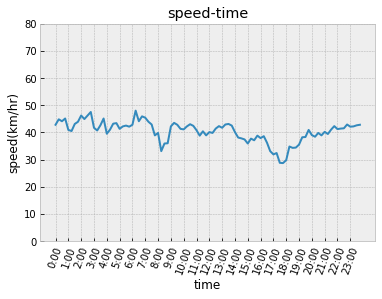

In [38]:
n=input('請輸入想調查的站點:')
plot1(n)